In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import imblearn
print(imblearn.__version__)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
import pandas as pd
from sklearn.preprocessing import RobustScaler, OneHotEncoder
import random
import numpy as np
from scipy import stats
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, LSTM, SimpleRNN, TimeDistributed, Activation, InputLayer
from keras.optimizers import Adam
from tensorflow.python.keras import regularizers
from sklearn.utils import class_weight
from keras import backend as K
import statistics as st
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt
from keras.layers.normalization import BatchNormalization
from sklearn.preprocessing import FunctionTransformer
from imblearn.over_sampling import SMOTE
from numpy import dstack
from keras.utils import to_categorical
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import tensorflow as tf

scaler = StandardScaler()

In [4]:
X_files = ['subject_001_01__x.csv', 'subject_001_02__x.csv', 
           'subject_001_03__x.csv', 'subject_001_04__x.csv',
           'subject_001_06__x.csv',
           'subject_001_07__x.csv', 'subject_001_08__x.csv',
           'subject_002_01__x.csv', 'subject_002_02__x.csv',
           'subject_002_03__x.csv',
           'subject_002_05__x.csv', 'subject_003_01__x.csv',
           'subject_005_02__x.csv',
           'subject_005_03__x.csv', 'subject_006_01__x.csv',
           'subject_006_02__x.csv', 'subject_006_03__x.csv',
           'subject_007_01__x.csv',
           'subject_007_03__x.csv', 'subject_007_04__x.csv',
           'subject_008_01__x.csv']

X_test_files = ['subject_001_05__x.csv','subject_005_01__x.csv']
X_val_files = ['subject_007_02__x.csv','subject_002_04__x.csv']

y_files = ['subject_001_01__y.csv', 'subject_001_02__y.csv', 
           'subject_001_03__y.csv', 'subject_001_04__y.csv',
           'subject_001_06__y.csv',
           'subject_001_07__y.csv', 'subject_001_08__y.csv',
           'subject_002_01__y.csv', 'subject_002_02__y.csv',
           'subject_002_03__y.csv',
           'subject_002_05__y.csv', 'subject_003_01__y.csv',
           'subject_005_02__y.csv',
           'subject_005_03__y.csv', 'subject_006_01__y.csv',
           'subject_006_02__y.csv', 'subject_006_03__y.csv',
           'subject_007_01__y.csv',
           'subject_007_03__y.csv', 'subject_007_04__y.csv',
           'subject_008_01__y.csv']

y_test_files = ['subject_001_05__y.csv', 'subject_005_01__y.csv']
y_val_files = ['subject_007_02__y.csv',  'subject_002_04__y.csv']

# val_X = ['subject_003_02__x.csv', 'subject_003_03__x.csv',
#          'subject_004_01__x.csv', 'subject_004_02__x.csv']
# val_X_t = ['subject_003_02__x_time.csv', 'subject_003_03__x_time.csv',
#            'subject_004_01__x_time.csv', 'subject_004_02__x_time.csv']
# val_y = ['subject_003_02__y.csv', 'subject_003_03__y.csv',
#          'subject_004_01__y.csv', 'subject_004_02__y.csv']
# val_y_t = ['subject_003_02__y_time.csv', 'subject_003_03__y_time.csv',
#            'subject_004_01__y_time.csv', 'subject_004_02__y_time.csv']

# X_predict_files = ['subject_009_01__x.csv', 'subject_010_01__x.csv', 'subject_011_01__x.csv', 'subject_012_01__x.csv']

In [5]:
cd '/content/gdrive/MyDrive/data/'

/content/gdrive/MyDrive/data


In [ ]:
# df_y = pd.read_csv(y_files[0])
# df_X =pd.read_csv(X_files[0])

AttributeError: ignored

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# df_X=sc.fit_transform(df_X)

In [ ]:
# df_y['0'][0]

0

In [ ]:
# a=[]
# for i in range(0, len(df_y)):
#   a+=[df_y['0'][i]] * 4


In [ ]:
# upsampled_df = pd.DataFrame(a)
# diff = df_X.shape[0] - upsampled_df.shape[0]
# df_X = df_X.iloc[:-diff,:]

37888

In [6]:
final_x_train= []
final_y_train=[]
from collections import Counter


In [7]:
def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]

In [8]:
def mode(a, axis=0):
    scores = np.unique(np.ravel(a))       # get ALL unique values
    testshape = list(a.shape)
    testshape[axis] = 1
    oldmostfreq = np.zeros(testshape)
    oldcounts = np.zeros(testshape)

    for score in scores:
        template = (a == score)
        counts = np.expand_dims(np.sum(template, axis),axis)
        mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
        oldcounts = np.maximum(counts, oldcounts)
        oldmostfreq = mostfrequent

    return mostfrequent, oldcounts

In [9]:
## preprocessing for training data
for i in range(len(y_files)):
  X_df = pd.read_csv(X_files[i])
  y_df = pd.read_csv(y_files[i])
  a=[]
  for i in range(0, len(y_df)):
    a+=[y_df['0'][i]] * 4
  upsampled_df = pd.DataFrame(a)
  diff = X_df.shape[0] - upsampled_df.shape[0]
  X_df = X_df.iloc[:-diff,:]

  sc=StandardScaler()
  X_df=sc.fit_transform(X_df)

  x_arr=[]
  y_arr=[]

  for j in range(len(X_df)-30):
            window=30
            df = X_df[j].copy()
            df_len = len(df)
            x_arr.append(X_df[j:(j+window)]) 
            y_arr.append(mode(upsampled_df.iloc[j:(j+window)])[0])
  final_x_train.append(np.array(x_arr))
  final_y_train.append(np.array(y_arr).reshape(-1,1))



In [10]:
trainX, trainY = np.concatenate(final_x_train), np.concatenate(final_y_train)

In [11]:
trainX.shape, trainY.shape

((991762, 30, 6), (991762, 1))

array([0.])

In [12]:
t = pd.DataFrame(trainY)
t.value_counts()

0.0    734784
3.0    163013
2.0     53229
1.0     40736
dtype: int64

In [13]:
final_x_val = []
final_y_val = []

In [14]:
## preprocessing for val data
for i in range(len(y_val_files)):
  X_df = pd.read_csv(X_val_files[i])
  y_df = pd.read_csv(y_val_files[i])
  a=[]
  for i in range(0, len(y_df)):
    a+=[y_df['0'][i]] * 4
  upsampled_df = pd.DataFrame(a)
  diff = X_df.shape[0] - upsampled_df.shape[0]
  X_df = X_df.iloc[:-diff,:]

  sc=StandardScaler()
  X_df=sc.fit_transform(X_df)

  x_arr=[]
  y_arr=[]

  for j in range(len(X_df)-30):
            window=30
            df = X_df[j].copy()
            df_len = len(df)
            x_arr.append(X_df[j:(j+window)]) 
            y_arr.append(mode(upsampled_df.iloc[j:(j+window)])[0])
  final_x_val.append(np.array(x_arr))
  final_y_val.append(np.array(y_arr).reshape(-1,1))



In [15]:
valX, valY = np.concatenate(final_x_val), np.concatenate(final_y_val)

In [16]:
valX.shape, valY.shape

((98380, 30, 6), (98380, 1))

In [17]:
final_x_test = []
final_y_test =[]

In [18]:
## preprocessing for test data
for i in range(len(y_test_files)):
  X_df = pd.read_csv(X_test_files[i])
  y_df = pd.read_csv(y_test_files[i])
  a=[]
  for i in range(0, len(y_df)):
    a+=[y_df['0'][i]] * 4
  upsampled_df = pd.DataFrame(a)
  diff = X_df.shape[0] - upsampled_df.shape[0]
  X_df = X_df.iloc[:-diff,:]

  sc=StandardScaler()
  X_df=sc.fit_transform(X_df)

  x_arr=[]
  y_arr=[]

  for j in range(len(X_df)-30):
            window=30
            df = X_df[j].copy()
            df_len = len(df)
            x_arr.append(X_df[j:(j+window)]) 
            y_arr.append(mode(upsampled_df.iloc[j:(j+window)])[0])
  final_x_test.append(np.array(x_arr))
  final_y_test.append(np.array(y_arr).reshape(-1,1))



In [19]:
testX, testY = np.concatenate(final_x_test), np.concatenate(final_y_test)

In [20]:
testX.shape, testY.shape

((115132, 30, 6), (115132, 1))

In [21]:
from sklearn.utils import class_weight

label_weights = class_weight.compute_class_weight('balanced', np.unique(trainY), trainY.ravel())
print(label_weights)
label_weights = {i:label_weights[i] for i in range(len(label_weights))} # Create dictionary
print(label_weights)

[0.33743318 6.08652052 4.65799658 1.52098606]
{0: 0.33743317764132047, 1: 6.08652052238806, 2: 4.657996580811212, 3: 1.520986056326796}


In [22]:
from keras import utils as np_utils
hot_y_train = np_utils.to_categorical(trainY)
hot_y_val = np_utils.to_categorical(valY)
hot_y_test = np_utils.to_categorical(testY)


In [30]:
timestep, features, n_outputs = trainX.shape[1], trainX.shape[2] , hot_y_train.shape[1]
model_LSTM = Sequential()
model_LSTM.add(InputLayer(input_shape=(timestep, features)))
model_LSTM.add(LSTM(units=125, activation='relu'))
model_LSTM.add(Dropout(0.5))
model_LSTM.add(Dense(units = 125, activation = 'relu'))
model_LSTM.add(Dense(n_outputs, activation='softmax')) # output layer
model_LSTM.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

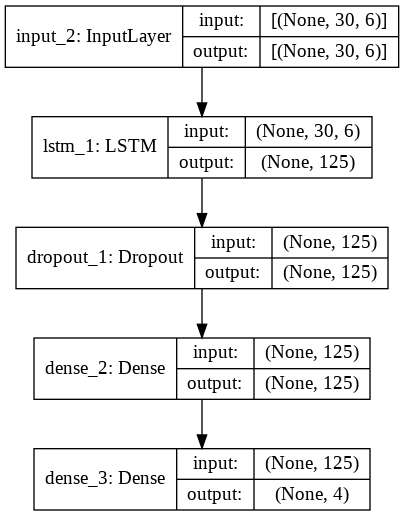

In [31]:
from keras.utils.vis_utils import plot_model
plot_model(model_LSTM, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [32]:
history = model_LSTM.fit(trainX, hot_y_train, epochs = 10, batch_size = 256,
                   validation_data = (valX, hot_y_val), class_weight = label_weights,
                   verbose = 1, shuffle = True)

Epoch 1/10
3875/3875 [==============================] - 485s 125ms/step - loss: 0.5769 - accuracy: 0.6292 - val_loss: 0.4687 - val_accuracy: 0.8306
Epoch 2/10
3875/3875 [==============================] - 491s 127ms/step - loss: 0.2100 - accuracy: 0.8736 - val_loss: 0.4008 - val_accuracy: 0.8570
Epoch 3/10
3875/3875 [==============================] - 495s 128ms/step - loss: 0.1599 - accuracy: 0.9022 - val_loss: 0.2499 - val_accuracy: 0.9067
Epoch 4/10
3875/3875 [==============================] - 484s 125ms/step - loss: 0.1281 - accuracy: 0.9194 - val_loss: 0.2017 - val_accuracy: 0.9292
Epoch 5/10
3875/3875 [==============================] - 482s 124ms/step - loss: 0.1086 - accuracy: 0.9298 - val_loss: 0.2615 - val_accuracy: 0.9037
Epoch 6/10
3875/3875 [==============================] - 477s 123ms/step - loss: 0.2007 - accuracy: 0.9152 - val_loss: 0.2132 - val_accuracy: 0.9223
Epoch 7/10
3875/3875 [==============================] - 475s 123ms/step - loss: 0.0887 - accuracy: 0.9415 - val_

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


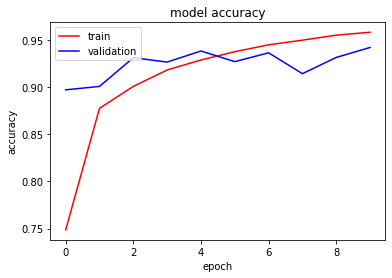

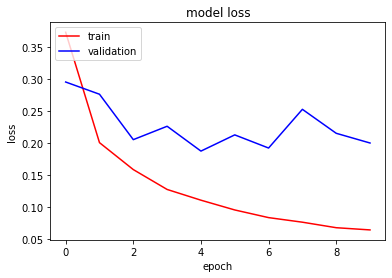

In [26]:
print(history.history.keys())
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

y_pred = model_LSTM.predict(testX, batch_size = 256, verbose = 1)
y_test_bool = np.argmax(y_pred, axis = 1)
print(classification_report(testY, y_test_bool))

450/450 [==============================] - 21s 46ms/step
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96     90937
         1.0       0.83      0.97      0.90      6247
         2.0       0.82      0.98      0.89      9171
         3.0       0.77      0.74      0.75      8777

    accuracy                           0.93    115132
   macro avg       0.85      0.91      0.87    115132
weighted avg       0.94      0.93      0.93    115132



In [28]:
print(confusion_matrix(testY, y_test_bool))

[[85871  1212  1902  1952]
 [  126  6046    48    27]
 [  173     0  8991     7]
 [ 2213     3    54  6507]]


In [ ]:
cd ..

/content/gdrive/My Drive


In [ ]:
cd 'TestData'

/content/gdrive/My Drive/TestData


In [ ]:
input_data = pd.read_csv('subject_009_01__x.csv')
df=sc.fit_transform(input_data)
y_frame = pd.read_csv('subject_009_01__y_time.csv')
addl_rows = y_frame.shape[0] * 4 - df.shape[0] + 30
addl_rows_df = pd.DataFrame(df[-addl_rows:])
df = pd.DataFrame(df)
df = df.append(addl_rows_df)
X_values = []
for i in range(0, len(df) - 30, 1):
    value = df.iloc[i:(i + 30)].values
    X_values.append(value)
X_test = np.array(X_values)
y_test = model_LSTM.predict(X_test, batch_size = 64, verbose = 1)
y_test_class = np.argmax(y_test, axis = 1)
output_actual = []
for i in range(0, y_test_class.shape[0], 4):
    a = list(y_test_class[i:i + 4])
    output_actual.append(max(a, key = a.count))
y_actual = np.array(output_actual)
print(y_actual.size)
y_series = pd.Series(y_actual)

594/594 [==============================] - 10s 18ms/step
9497


In [ ]:
from google.colab import files
y_series.to_csv('subject_009_01__y_prediction.csv') 
files.download('subject_009_01__y_prediction.csv')
y_series.value_counts()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0    6390
3    2490
1     410
2     207
dtype: int64

In [ ]:
input_data = pd.read_csv('subject_010_01__x.csv')
df=sc.fit_transform(input_data)
y_frame = pd.read_csv('subject_010_01__y_time.csv')
addl_rows = y_frame.shape[0] * 4 - df.shape[0] + 30
addl_rows_df = pd.DataFrame(df[-addl_rows:])
df = pd.DataFrame(df)
df = df.append(addl_rows_df)
X_values = []
for i in range(0, len(df) - 30, 1):
    value = df.iloc[i:(i + 30)].values
    X_values.append(value)
X_test = np.array(X_values)
y_test = model_LSTM.predict(X_test, batch_size = 64, verbose = 1)
y_test_class = np.argmax(y_test, axis = 1)
output_actual = []
for i in range(0, y_test_class.shape[0], 4):
    a = list(y_test_bool[i:i + 4])
    output_actual.append(max(a, key = a.count))
y_actual = np.array(output_actual)
print(y_actual.size)
y_series = pd.Series(y_actual)

767/767 [==============================] - 14s 18ms/step
12269


In [ ]:
y_series.to_csv('subject_010_01__y_prediction.csv') 
files.download('subject_010_01__y_prediction.csv')
y_series.value_counts()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0    8624
2    1683
1    1257
3     705
dtype: int64

In [ ]:
input_data = pd.read_csv('subject_011_01__x.csv')
df=sc.fit_transform(input_data)
y_frame = pd.read_csv('subject_011_01__y_time.csv')
addl_rows = y_frame.shape[0] * 4 - df.shape[0] + 30
addl_rows_df = pd.DataFrame(df[-addl_rows:])
df = pd.DataFrame(df)
df = df.append(addl_rows_df)
X_values = []
for i in range(0, len(df) - 30, 1):
    value = df.iloc[i:(i + 30)].values
    X_values.append(value)
X_test = np.array(X_values)
y_test = model_LSTM.predict(X_test, batch_size = 64, verbose = 1)
y_test_class = np.argmax(y_test, axis = 1)
output_actual = []
for i in range(0, y_test_class.shape[0], 4):
    a = list(y_test_class[i:i + 4])
    output_actual.append(max(a, key = a.count))
y_actual = np.array(output_actual)
print(y_actual.size)
y_series = pd.Series(y_actual)

809/809 [==============================] - 14s 18ms/step
12939


In [ ]:
y_series.to_csv('subject_011_01__y_prediction.csv') 
files.download('subject_011_01__y_prediction.csv')
y_series.value_counts()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0    9084
3    2582
2     768
1     505
dtype: int64

In [ ]:
input_data = pd.read_csv('subject_012_01__x.csv')
df=sc.fit_transform(input_data)
y_frame = pd.read_csv('subject_012_01__y_time.csv')
addl_rows = y_frame.shape[0] * 4 - df.shape[0] + 30
addl_rows_df = pd.DataFrame(df[-addl_rows:])
df = pd.DataFrame(df)
df = df.append(addl_rows_df)
X_values = []
for i in range(0, len(df) - 30, 1):
    value = df.iloc[i:(i + 30)].values
    X_values.append(value)
X_test = np.array(X_values)
y_test = model_LSTM.predict(X_test, batch_size = 64, verbose = 1)
y_test_class = np.argmax(y_test, axis = 1)
output_actual = []
for i in range(0, y_test_class.shape[0], 4):
    a = list(y_test_class[i:i + 4])
    output_actual.append(max(a, key = a.count))
y_actual = np.array(output_actual)
print(y_actual.size)
y_series = pd.Series(y_actual)

709/709 [==============================] - 13s 18ms/step
11329


In [ ]:
y_series.to_csv('subject_012_01__y_prediction.csv') 
files.download('subject_012_01__y_prediction.csv')
y_series.value_counts()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0    8675
3    1137
2     887
1     630
dtype: int64

In [ ]:
input_data = pd.read_csv('subject_012_01__x.csv')
df=sc.fit_transform(input_data)
y_frame = pd.read_csv('subject_012_01__y_time.csv')
addl = y_frame.shape[0] * 4 - df.shape[0] + 30
addl_df = pd.DataFrame(df[-addl:])
df = pd.DataFrame(df)
df = df.append(addl_df)
X_values = []
for i in range(0, len(df) - 30, 1):
    value = df.iloc[i:(i + 30)].values
    X_values.append(value)
X_test = np.array(X_values)
y_test = model_LSTM.predict(X_test, batch_size = 64, verbose = 1)
y_test_bool = np.argmax(y_test, axis = 1)
output_actual = []
for i in range(0, y_test_bool.shape[0], 4):
    a = list(y_test_bool[i:i + 4])
    output_actual.append(max(a, key = a.count))
y_actual = np.array(output_actual)
print(y_actual.size)
y_series = pd.Series(y_actual)